<a href="https://colab.research.google.com/github/echandiesteban/202270-010-Team-The-Chargers-Project-Development-/blob/main/Pysan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pysan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 9.0 MB/s 
     |████████████████████████████████| 965 kB 41.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [6]:
from google.colab import files


uploaded = files.upload()

Saving Label_Sequences.csv to Label_Sequences (1).csv


In [7]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['Label_Sequences.csv']))
# Dataset is now stored in a Pandas Dataframe

In [8]:
arr = df["label_seq_1"].to_numpy()
arr2 = df["label_seq_2"].to_numpy()
arr3 = df["label_seq_3"].to_numpy()
arr4 = df["label_seq_4"].to_numpy()
arr5 = df["label_seq_5"].to_numpy()

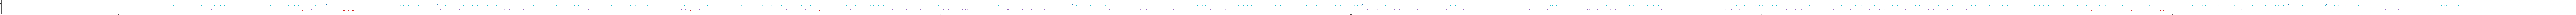

In [14]:
from pysan.core import plot_sequence

plt = plot_sequence(arr, highlighted_ngrams = [[8,7]])
plt.show()

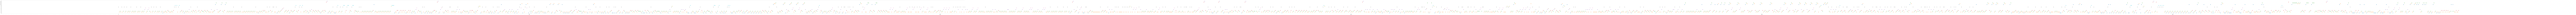

In [15]:
from pysan.core import plot_sequence

plt = plot_sequence(arr2, highlighted_ngrams = [[1,2]])
plt.show()

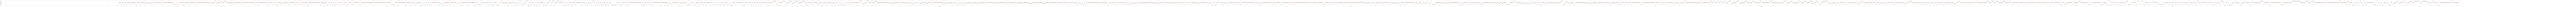

In [16]:
from pysan.core import plot_sequence

plt = plot_sequence(arr3, highlighted_ngrams = [[8,7]])
plt.show()

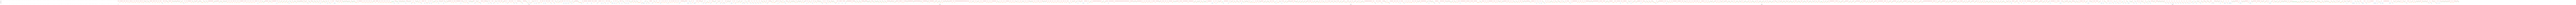

In [17]:
from pysan.core import plot_sequence

plt = plot_sequence(arr4, highlighted_ngrams = [[8,7]])
plt.show()

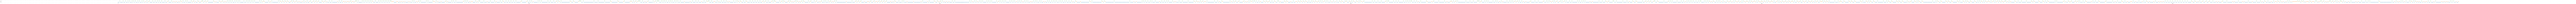

In [18]:
from pysan.core import plot_sequence

plt = plot_sequence(arr5, highlighted_ngrams = [[8,7]])
plt.show()

In [27]:
print(arr)

[1 7 8 ... 7 7 9]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

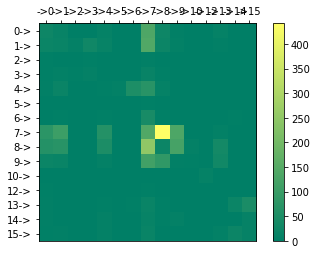

In [9]:

from pysan.transitions import plot_transition_matrix
list_1 = arr.tolist()
plot_transition_matrix(list_1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

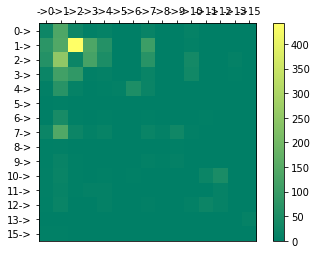

In [10]:
from pysan.transitions import plot_transition_matrix
list_2 = arr2.tolist()
plot_transition_matrix(list_2)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

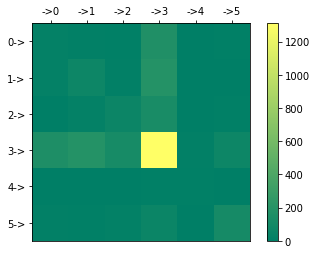

In [11]:
from pysan.transitions import plot_transition_matrix
list_3 = arr3.tolist()
plot_transition_matrix(list_3)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

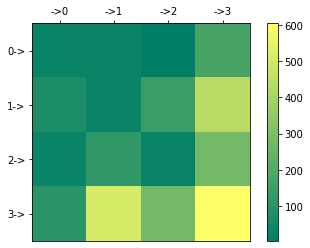

In [12]:
from pysan.transitions import plot_transition_matrix
list_4 = arr4.tolist()
plot_transition_matrix(list_4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

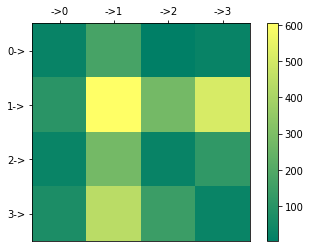

In [13]:
from pysan.transitions import plot_transition_matrix
list_5 = arr5.tolist()
plot_transition_matrix(list_5)

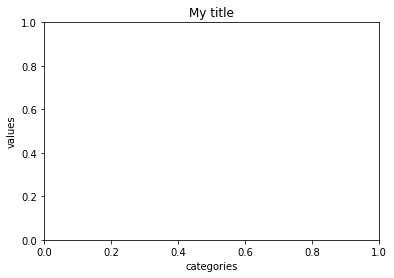

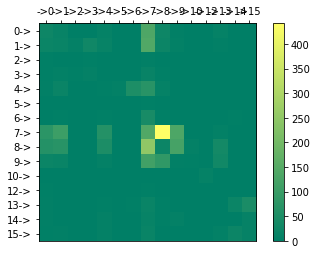

In [42]:
plt.title('My title')
plt.xlabel('categories')
plt.ylabel('values')
plt1 = plot_transition_matrix(list_1)

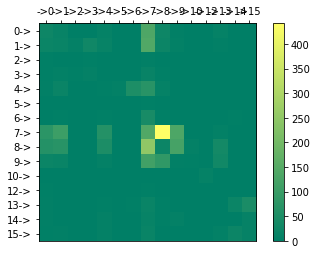

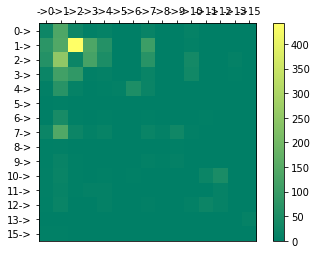

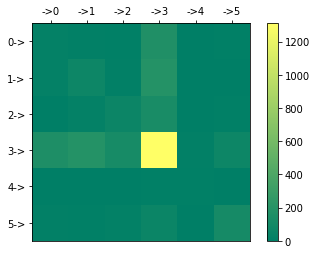

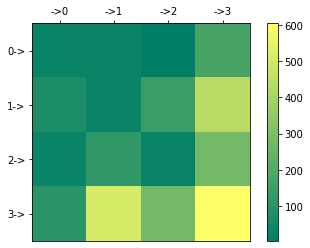

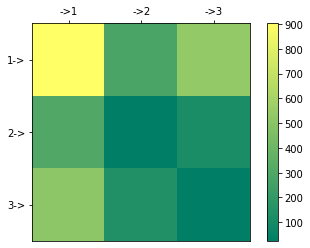

In [35]:
plt1 = plot_transition_matrix(list_1)
plt2 = plot_transition_matrix(list_2)
plt3 = plot_transition_matrix(list_3)
plt4 = plot_transition_matrix(list_4)
plt5 = plot_transition_matrix(list_5)

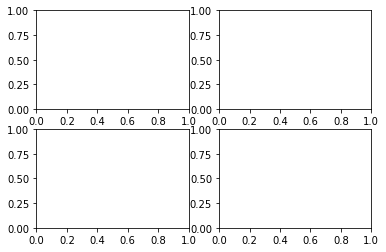

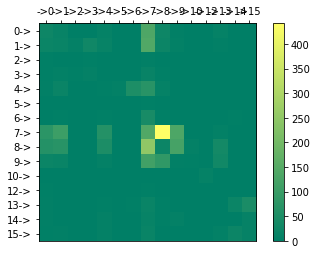

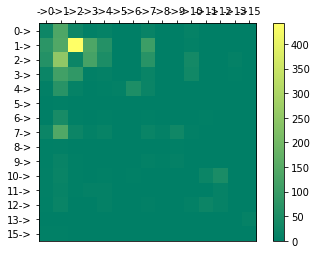

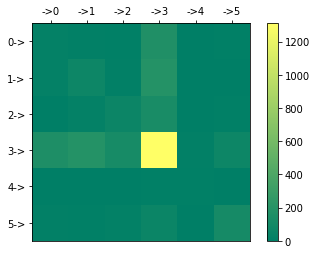

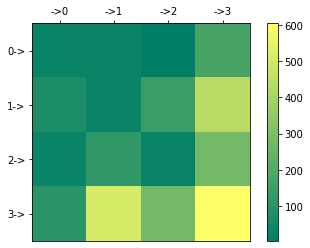

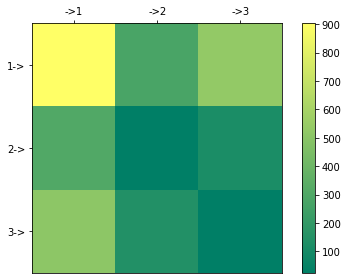

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2)

plt1 = plot_transition_matrix(list_1)
plt2 = plot_transition_matrix(list_2)
plt3 = plot_transition_matrix(list_3)
plt4 = plot_transition_matrix(list_4)
plt5 = plot_transition_matrix(list_5)


plt.tight_layout()

plt.show()

In [21]:
#export
from pysan.elements import get_alphabet
import math
def get_entropy(x):
    "Computes the normalised [Shannon entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)) of a given sequence, using the [scipy.stats.entropy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html) implementation. Note that this measure is insensitive to transition frequency or event order, so should be used in conjunction with other measures."

    alphabet = get_alphabet(x)

    entropy = 0
    for state in alphabet:
        proportion_occurances = x.count(state) / len(x)
        entropy += proportion_occurances * math.log(proportion_occurances)

    maximal_occurances = 1 / len(alphabet)
    alphabet_entropy = sum([maximal_occurances * math.log(maximal_occurances) for x in alphabet])

    if alphabet_entropy == 0:
        return 0

    return -entropy / -alphabet_entropy

Entropy1 = get_entropy(list_1)
Entropy2 = get_entropy(list_2)
Entropy3 = get_entropy(list_3)
Entropy4 = get_entropy(list_4)
Entropy5 = get_entropy(list_5)
print(Entropy1,Entropy2,Entropy3,Entropy4,Entropy5)

0.7332481553225132 0.7332481553225132 0.6395398362017959 0.8456202554704639 0.8456202554704639


In [29]:
#export
from pysan.elements import get_alphabet
from pysan.transitions import get_ntransitions
def get_complexity(sequence):
    "Computes the complexity of a given sequence, based on TraMineR's [seqici](http://traminer.unige.ch/doc/seqici.html) method."

    alphabet = get_alphabet(sequence)

    pre_log = 1 / len(alphabet)
    hmax = -math.log(pre_log)
    #print('hmax', hmax)
    if hmax == 0:
        return 0 # all identical elements, no complexity

    hs = get_entropy(sequence)
    #print('hs', hs)

    qs = get_ntransitions(sequence)
    #print('qs', qs)

    qmax = len(sequence) - 1
    #print('qmax', qmax)

    norm_transitions = qs / qmax
    norm_entropy = hs / hmax

    #print('nt', norm_transitions)
    #print('ne', norm_entropy)

    complexity = math.sqrt(norm_transitions * norm_entropy)

    #print('complexity', complexity)
    return complexity

In [41]:
Complexity1 = get_complexity(list_1)
Complexity2 = get_complexity(list_2)
Complexity3 = get_complexity(list_3)
Complexity4 = get_complexity(list_4)
Complexity5 = get_complexity(list_5)
print(Complexity1,Complexity2,Complexity3,Complexity4,Complexity5)


0.49899350271368953 0.49899350271368953 0.39627756846593604 0.6814274224076636 0.6814274224076636


In [ ]:
#export
def get_unique_ngrams(list_1, n):
    "Creates a list of all unique ngrams found in a given sequence."
    unique_ngrams = []
    for x in range(len(list_1) -  n + 1):
        this_ngram = list_1[x:x + n]

        if str(this_ngram) not in unique_ngrams:
            unique_ngrams.append(str(this_ngram))

    return [eval(x) for x in unique_ngrams]

get_unique_ngrams(list_1, 3)

    #export
def get_all_ngrams(list_1, n):
    "Creates a list of all ngrams found in a given sequence."

    all_ngrams = []
    for x in range(len(list_1) -  n + 1):
        this_ngram = list_1[x:x + n]
        all_ngrams.append(this_ngram)

    return all_ngrams


get_all_ngrams(arr, 3)

In [51]:
#export
def get_ngram_universe(list_1, n):
    "Computes the universe of possible ngrams given a sequence. Where n is equal to the length of the sequence, the resulting number represents the sequence universe."
    # if recurrance is possible, the universe is given by k^t (SSA pg 68)
    k = len(set(list_1))
    if k > 10 and n > 10:
        return 'really big'
    return k**n

    get_ngram_universe(list_1, 3)

In [53]:
#export
def get_ngram_counts(list_1, n):
    "Computes the prevalence of ngrams in a sequence, returning a dictionary where each key is an ngram, and each value is the number of times that ngram appears in the sequence."

    ngrams = get_unique_ngrams(list_1, n)

    ngram_counts = {str(i):0 for i in ngrams}    

    for x in range(len(list_1) -  n + 1):
        this_ngram = list_1[x:x + n]
        ngram_counts[str(this_ngram)] += 1

    return ngram_counts

    get_ngram_counts(list_1, 3)

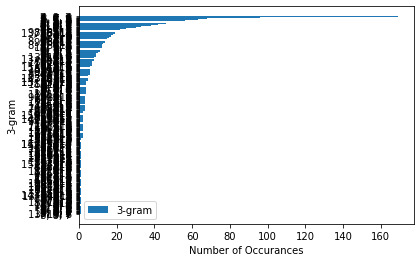

In [56]:
#export
import matplotlib.pyplot as plt
def plot_ngram_counts(list_1, n):
    "Plots the number of occurances of ngrams in a given sequence."

    ngram_counts = get_ngram_counts(list_1, n)
    ngram_counts = {k: ngram_counts[k] for k in sorted(ngram_counts, key=ngram_counts.get)}

    xdata = [key[1:len(key)-1].replace(', ', ', ') for key,value in ngram_counts.items()]
    ydata = [value for key,value in ngram_counts.items()]

    plt.figure()
    plt.barh(xdata, ydata, label=str(n) +'-gram')
    plt.xlabel('Number of Occurances')
    plt.ylabel(str(n) + '-gram')
    plt.gca().yaxis.grid(False)
    plt.legend()
    return plt

plt = plot_ngram_counts(list_1, 3)
plt.show()